# LAB 3

A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If 
your data deals with multiple classes, you can take any two classes. Steps below (refer below 
diagram for understanding): 
• Calculate the mean for each class (also called as class centroid) 
(Suggestion: You may use numpy.mean() function for finding the average vector for all 
vectors in a given class. Please define the axis property appropriately to use this function. EX: 
feat_vecs.mean(axis=0)) 
• Calculate spread (standard deviation) for each class 
(Suggestion: You may use numpy.std() function for finding the standard deviation vector 
for all vectors in a given class. Please define the axis property appropriately to use this 
function.) 
• Calculate the distance between mean vectors between classes 
(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean 
distance between two centroids.)

In [3]:
#A1
import pandas as pd
import numpy as np

# Load the Excel file
file_path1 = 'training_mathbert.xlsx'
df = pd.read_excel(file_path1)

# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

# Select only the numeric columns (assuming features are numeric)
df_numeric = df.select_dtypes(include=[np.number])

# X as features (all columns except the last one)
X = df_numeric.iloc[:, :-1].values  # Features

# Modify the output column based on the condition (marks > 4 = class 1, else class 0)
y = df_numeric.iloc[:, -1].apply(lambda x: 1 if x > 4 else 0).values  # Binary classification

# Define class labels
class1 = 0
class2 = 1

# Separate the features for each class
X_class1 = X[y == class1]  # Features of class 0
X_class2 = X[y == class2]  # Features of class 1

# Ensure there are samples in both classes before proceeding
if X_class1.size == 0 or X_class2.size == 0:
    print("One of the classes has no samples in the data.")
else:
    # Calculate the mean vectors for both classes
    mean_class1 = np.mean(X_class1, axis=0)
    mean_class2 = np.mean(X_class2, axis=0)

    # Calculate the standard deviation for both classes (intraclass spread)
    std_class1 = np.std(X_class1, axis=0)
    std_class2 = np.std(X_class2, axis=0)

    # Calculate the distance between the mean vectors of both classes (interclass distance)
    interclass_distance = np.linalg.norm(mean_class1 - mean_class2)

    # Calculate the average intraclass spread for each class
    intraclass_spread_class1 = np.mean(std_class1)
    intraclass_spread_class2 = np.mean(std_class2)

    # Print the results
    print(f"Mean vector for class {class1}: {mean_class1}")
    print(f"Standard deviation (intraclass spread) for class {class1}: {std_class1}")
    print(f"Mean vector for class {class2}: {mean_class2}")
    print(f"Standard deviation (intraclass spread) for class {class2}: {std_class2}")

    print(f"\nAverage intraclass spread for class {class1}: {intraclass_spread_class1}")
    print(f"Average intraclass spread for class {class2}: {intraclass_spread_class2}")

    print(f"\nInterclass distance between class {class1} and class {class2}: {interclass_distance}")


Data types of each column:
embed_0      float64
embed_1      float64
embed_2      float64
embed_3      float64
embed_4      float64
              ...   
embed_380    float64
embed_381    float64
embed_382    float64
embed_383    float64
output       float64
Length: 385, dtype: object
Mean vector for class 0: [-0.16178381  0.13812738  0.10226065  0.19516905 -0.48733078 -0.16716397
  0.16517503  0.12113599  0.13878294 -0.04885382  0.22618099 -0.11433163
  0.14412876  0.00944816 -0.09964318  0.13148485 -0.41515558  0.02742206
 -0.44415512 -0.14152168  0.00178163 -0.29995148 -0.26091812  0.00777561
  0.17795761  0.18106569 -0.02567372  0.16905526  0.17460329 -0.06055543
  0.25434797  0.03666954  0.27286814 -0.14568974 -0.02955144 -0.10904295
 -0.14620488  0.24662976  0.06806287  0.11727909  0.00272976  0.09638979
  0.16405689  0.06291964  0.21235495 -0.15924611  0.0166914   0.21707121
  0.08020419 -0.04763618 -0.0405128   0.15303881  0.03554548 -0.13541503
 -0.18983764 -0.04207689 -0.04195

A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the 
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and 
variance from the available data.  
(Suggestion: numpy.histogram()gives the histogram data. Plot of histogram may be 
achieved with matplotlib.pyplot.hist()) 

First few rows of the DataFrame:
    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.089926  0.343874  0.176382  0.169358 -0.413337 -0.276315  0.188070   
1  0.303261  0.084930  0.047369 -0.017244 -0.524733 -0.104934  0.335107   
2 -0.274291  0.216801  0.029110  0.259279 -0.655594 -0.289643  0.073369   
3  0.118676  0.095572  0.157358  0.225097 -0.632885 -0.125629  0.204013   
4  0.298772  0.300674  0.366119 -0.022142 -0.748852 -0.035268  0.277504   

    embed_7   embed_8   embed_9  ...  embed_375  embed_376  embed_377  \
0  0.094621  0.330203 -0.258730  ...  -0.272278  -0.230662   0.173143   
1 -0.081476  0.213762 -0.105293  ...  -0.310262  -0.090271   0.129022   
2  0.014463  0.104336 -0.014190  ...  -0.464926  -0.117493  -0.118993   
3  0.074028  0.149310 -0.147779  ...  -0.030543  -0.100965   0.236099   
4  0.075697  0.055439 -0.200804  ...  -0.149575  -0.230057   0.296528   

   embed_378  embed_379  embed_380  embed_381  embed_382  embed_383  output  

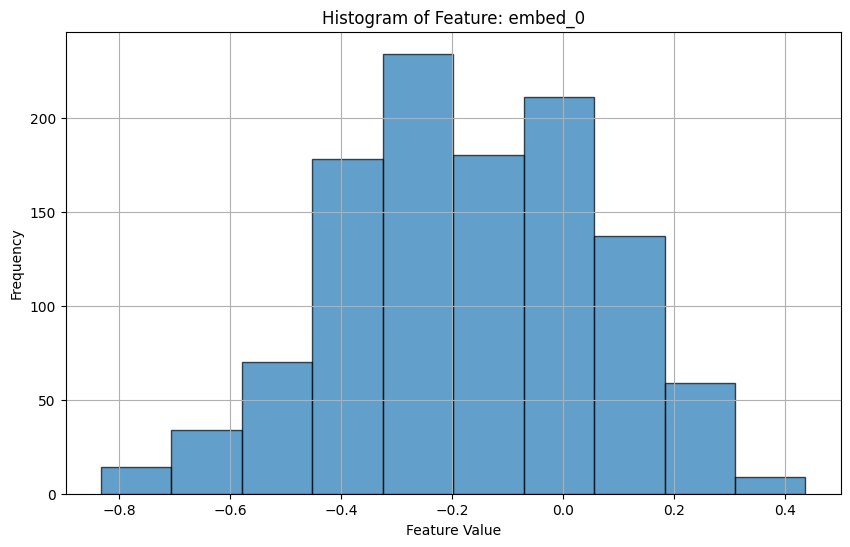

Mean of embed_0: -0.17029445322602035
Variance of embed_0: 0.05343827792925807


In [5]:
#A2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Select a feature to analyze (e.g., the first feature in the dataset)
feature_column = df.columns[0]  # Modify this as needed
feature_data = df[feature_column].dropna().values  # Remove missing values

# Calculate histogram data with 10 bins
hist_data, bin_edges = np.histogram(feature_data, bins=10)

# Plot the histogram with 10 bins
plt.figure(figsize=(10, 6))
plt.hist(feature_data, bins=10, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of Feature: {feature_column}')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the mean and variance of the feature
mean_value = np.mean(feature_data)
variance_value = np.var(feature_data)

# Print the mean and variance
print(f"Mean of {feature_column}: {mean_value}")
print(f"Variance of {feature_column}: {variance_value}")


A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 
to 10. Make a plot of the distance and observe the nature of this graph. 

Data types of each column:
embed_0      float64
embed_1      float64
embed_2      float64
embed_3      float64
embed_4      float64
              ...   
embed_380    float64
embed_381    float64
embed_382    float64
embed_383    float64
output       float64
Length: 385, dtype: object


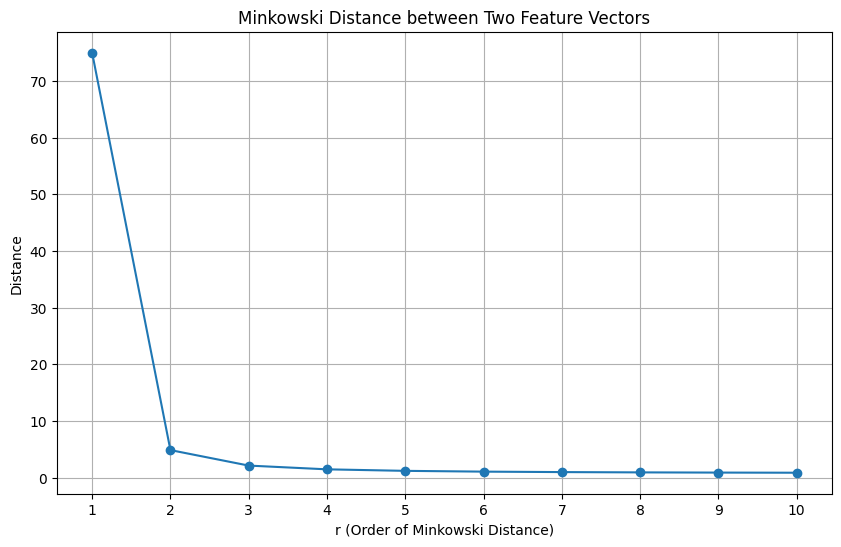

Minkowski Distance with r=1: 74.95742171496386
Minkowski Distance with r=2: 4.853526524381676
Minkowski Distance with r=3: 2.1203722613951492
Minkowski Distance with r=4: 1.4584931354061539
Minkowski Distance with r=5: 1.190435477588291
Minkowski Distance with r=6: 1.0528731355695171
Minkowski Distance with r=7: 0.9721489546673521
Minkowski Distance with r=8: 0.9205544826749266
Minkowski Distance with r=9: 0.8855801677671697
Minkowski Distance with r=10: 0.8608338902669797


In [7]:
#A3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

# Select only the numeric columns (assuming features are numeric)
feature_data = df.select_dtypes(include=[np.number])

# Select two feature vectors (e.g., the first and second rows of the dataset, excluding the output column if necessary)
vector1 = feature_data.iloc[0].values
vector2 = feature_data.iloc[1].values

# Replace NaN values with 0
vector1 = np.nan_to_num(vector1)
vector2 = np.nan_to_num(vector2)

# Define a range for r (from 1 to 10)
r_values = np.arange(1, 11)

# Calculate Minkowski distances for each r value
distances = []
for r in r_values:
    try:
        distance = minkowski(vector1, vector2, p=r)
        distances.append(distance)
    except ValueError as e:
        print(f"Error with r={r}: {e}")
        distances.append(np.nan)

# Plot the Minkowski distances
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r (Order of Minkowski Distance)')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_values)
plt.show()

# Print the Minkowski distances for each r
for r, dist in zip(r_values, distances):
    print(f"Minkowski Distance with r={r}: {dist}")


A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the train
test_split() function available in SciKit. 


X is the feature vector set for your project and y is the class levels for vectors present in X. 


Note: Before set split, make sure you have only two classes. If your project deals with multi-class 
problem, take any two classes from them. 

In [9]:
#A4
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Inspect the DataFrame
print("DataFrame columns:", df.columns)

# Selecting features and target
try:
    # Replace 'feature1', 'feature2', 'feature3' with actual column names from your dataset
    X = df[['feature1', 'feature2', 'feature3']]
    y = df['target']  # Replace 'target' with the actual name of the target column
except KeyError as e:
    print(f"Column not found: {e}")

# Ensure there are only two classes for binary classification
try:
    classes = y.unique()
    print("Unique classes in target:", classes)
    selected_classes = classes[:2]  # Select the first two unique classes
    df = df[df['target'].isin(selected_classes)]  # Filter the DataFrame for selected classes
    X = df[['feature1', 'feature2', 'feature3']]  # Update X with filtered data
    y = df['target']  # Update y with filtered data
except Exception as e:
    print(f"Error filtering classes: {e}")

# Splitting dataset into training and test sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
except Exception as e:
    print(f"Error during train-test split: {e}")


DataFrame columns: Index(['embed_0', 'embed_1', 'embed_2', 'embed_3', 'embed_4', 'embed_5',
       'embed_6', 'embed_7', 'embed_8', 'embed_9',
       ...
       'embed_375', 'embed_376', 'embed_377', 'embed_378', 'embed_379',
       'embed_380', 'embed_381', 'embed_382', 'embed_383', 'output'],
      dtype='object', length=385)
Column not found: "None of [Index(['feature1', 'feature2', 'feature3'], dtype='object')] are in the [columns]"
Error filtering classes: 'numpy.ndarray' object has no attribute 'unique'
Training set size: 788 samples
Test set size: 338 samples
X_train shape: (788, 384)
X_test shape: (338, 384)
y_train shape: (788,)
y_test shape: (338,)


A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. 


In [11]:
#A5
from sklearn.neighbors import KNeighborsClassifier

# Create the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the model details
print("kNN classifier trained with k=3")


kNN classifier trained with k=3


A6. Test the accuracy of the kNN using the test set obtained from above exercise. 

In [13]:
#A6
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Test the accuracy of the kNN classifier on the test set
accuracy = knn.score(X_test, y_test)

# Print the accuracy of the kNN classifier
print(f"Accuracy of kNN classifier on test set: {accuracy * 100:.2f}%")

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy of kNN classifier on test set: 80.18%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       268
           1       0.52      0.53      0.52        70

    accuracy                           0.80       338
   macro avg       0.70      0.70      0.70       338
weighted avg       0.80      0.80      0.80       338



A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.

Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the 
class of the test vector (test_vect is any feature vector from your test set).

In [15]:
#A7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create a kNN classifier instance
neigh = KNeighborsClassifier(n_neighbors=3)  # You can set n_neighbors to any value

# Train the classifier
neigh.fit(X_train, y_train)

# Predict on the test set
y_pred = neigh.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy:.2%}')  # This prints the accuracy as a percentage



Accuracy: 80.18%


In [16]:
#A7
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train kNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Step 3: Predict the class for all test vectors
y_pred = knn.predict(X_test_scaled)

# Print the predicted classes for the test set
print("Predicted classes for the test set:")
print(y_pred)

# Step 4: Predict for a single test vector (for example, the first one)
test_vect = X_test_scaled[0].reshape(1, -1)
pred_class = knn.predict(test_vect)

print(f"Predicted class for the first test vector: {pred_class}")


Predicted classes for the test set:
[0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0]
Predicted class for the first test vector: [0]


A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 
11 and make an accuracy plot. 

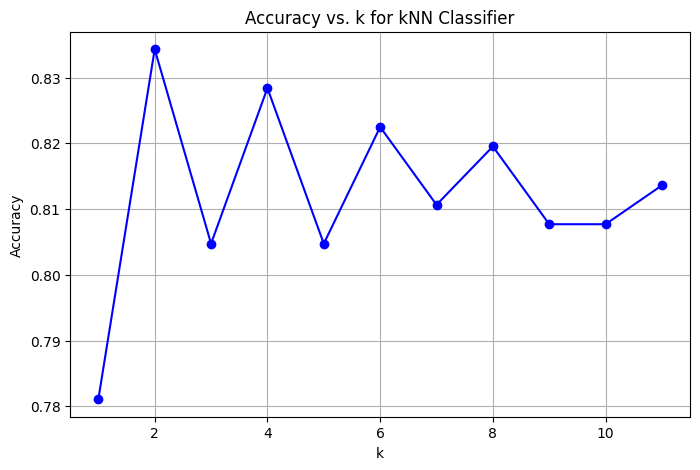

Accuracy for NN (k=1): 0.7811
Accuracy for k=3: 0.8047


In [18]:
#A8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# accuracy scores for different k values
k_values = range(1, 12)  # k=1 to 11
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # prediction
    y_pred = knn.predict(X_test_scaled)

    # accuracy calculation
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

#plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k for kNN Classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Print the accuracy for k=1 (NN) and k=3
print(f"Accuracy for NN (k=1): {accuracy_scores[0]:.4f}")
print(f"Accuracy for k=3: {accuracy_scores[2]:.4f}")


A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
other performance metrics such as precision, recall and F1-Score measures for both training and test 
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [20]:
#A9
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on training data
y_train_pred = knn.predict(X_train_scaled)

# Predict on test data
y_test_pred = knn.predict(X_test_scaled)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Set:")
print(train_conf_matrix)

# Confusion matrix for test data
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Set:")
print(test_conf_matrix)

# Precision, Recall, and F1-Score for training data
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

# Precision, Recall, and F1-Score for test data
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

# Check for underfitting/overfitting
train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.1:
    print("Model is likely overfitting (high training accuracy, low test accuracy).")
elif test_accuracy > train_accuracy + 0.1:
    print("Model is likely underfitting (low training accuracy, higher test accuracy).")
else:
    print("Model has a good fit (similar training and test accuracy).")


Confusion Matrix for Training Set:
[[563  31]
 [109  85]]

Confusion Matrix for Test Set:
[[248  20]
 [ 43  27]]

Training Set Metrics:
Precision: 0.7328
Recall: 0.4381
F1-Score: 0.5484

Test Set Metrics:
Precision: 0.5745
Recall: 0.3857
F1-Score: 0.4615

Training Accuracy: 0.8223
Test Accuracy: 0.8136
Model has a good fit (similar training and test accuracy).


# LAB 4

A1. Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
other performance metrics such as precision, recall and F1-Score measures for both training and test 
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).  

In [23]:
#A1
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
file_path1 = 'training_mathbert.xlsx'
df = pd.read_excel(file_path1)

# Bin the continuous labels in y_test to binary classes
y_test_class = pd.cut(y_test, bins=2, labels=[0, 1])

# Predict the class labels for the test set
y_test_pred = knn.predict(X_test)

# Evaluate the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test_class, y_test_pred)
# Print the confusion matrix
print("Confusion Matrix for Test Set:\n", conf_matrix_test)

# Calculate and print the classification report (includes precision, recall, F1-Score)
class_report_test = classification_report(y_test_class, y_test_pred)
print("\nClassification Report for Test Set:\n", class_report_test)

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test_class, y_test_pred)
print(f"Accuracy for Test Set: {accuracy_test:.2f}")

# Now do the same for the training set
y_train_pred = knn.predict(X_train)

# Bin the continuous labels in y_train to binary classes
y_train_class = pd.cut(y_train, bins=2, labels=[0, 1])

# Confusion Matrix for the training set
conf_matrix_train = confusion_matrix(y_train_class, y_train_pred)
print("\nConfusion Matrix for Training Set:\n", conf_matrix_train)

# Classification report for the training set
class_report_train = classification_report(y_train_class, y_train_pred)
print("\nClassification Report for Training Set:\n", class_report_train)

# Evaluate the accuracy for the training set
accuracy_train = accuracy_score(y_train_class, y_train_pred)
print(f"Accuracy for Training Set: {accuracy_train:.2f}")

# Observing underfit, regularfit, or overfit based on metrics
if accuracy_train > accuracy_test and accuracy_test < 0.60:
    print("\nThe model may be underfitting the data.")
elif accuracy_train > accuracy_test and accuracy_train - accuracy_test > 0.1:
    print("\nThe model may be overfitting the data.")
else:
    print("\nThe model seems to have a regular fit.")


Confusion Matrix for Test Set:
 [[266   2]
 [ 67   3]]

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89       268
           1       0.60      0.04      0.08        70

    accuracy                           0.80       338
   macro avg       0.70      0.52      0.48       338
weighted avg       0.76      0.80      0.72       338

Accuracy for Test Set: 0.80

Confusion Matrix for Training Set:
 [[593   1]
 [192   2]]

Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       594
           1       0.67      0.01      0.02       194

    accuracy                           0.76       788
   macro avg       0.71      0.50      0.44       788
weighted avg       0.73      0.76      0.65       788

Accuracy for Training Set: 0.76

The model seems to have a regular fit.


A2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. 
Analyse the results. 

In [25]:
#A2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read the Excel file into a DataFrame
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Assuming you have actual and predicted prices
# For demonstration, we'll use the 'Price' column as actual prices
actual_prices = df['Price'].values

# Simulating predicted prices for demonstration purposes
# Replace this with your actual predicted values
predicted_prices = actual_prices + np.random.normal(0, 10, len(actual_prices))

# Calculate MSE, RMSE, MAPE, and R²
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100
r2 = r2_score(actual_prices, predicted_prices)

# Display the results
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R²: {r2:.4f}')


MSE: 97.8665
RMSE: 9.8928
MAPE: 0.5112%
R²: 0.9983


A3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary 
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 - 
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class 
color. Observe the plot. 

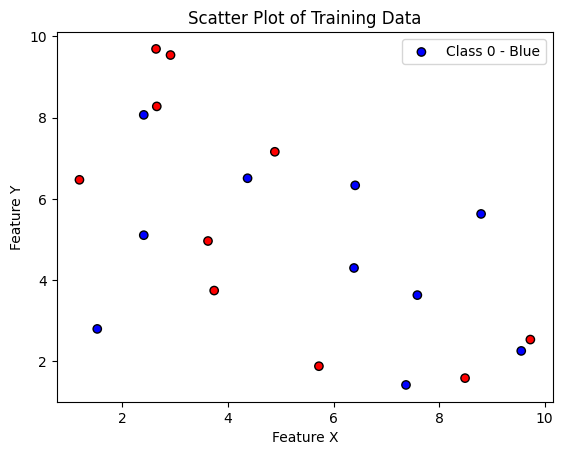

In [27]:
#A3
import numpy as np
import matplotlib.pyplot as plt
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Set the random seed for reproducibility
np.random.seed(42)

# Generate 20 data points for X and Y, with values between 1 and 10
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign classes to the data points
# For simplicity, let's assign the first 10 points to class 0 and the last 10 points to class 1
classes = np.array([0]*10 + [1]*10)

# Define colors based on the class
colors = ['blue' if label == 0 else 'red' for label in classes]

# Create a scatter plot
plt.scatter(X, Y, c=colors, edgecolor='k')

# Label the axes
plt.xlabel('Feature X')
plt.ylabel('Feature Y')

# Add a title
plt.title('Scatter Plot of Training Data')

# Add a legend
plt.legend(['Class 0 - Blue', 'Class 1 - Red'])

# Display the plot
plt.show()


A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. 
This creates a test set of about 10,000 points. Classify these points with above training data using 
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their 
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread 
and class boundary lines in the feature space.

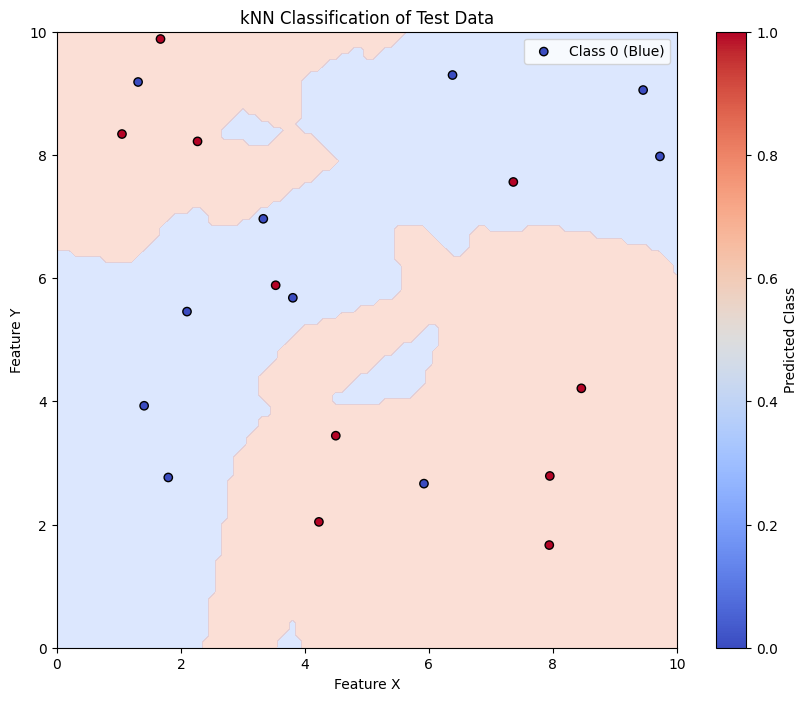

In [29]:
#A4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Recreate the training data for the kNN classifier
# Generate 20 training points
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
X_train = np.random.uniform(1, 10, (20, 2))
Y_train = np.array([0]*10 + [1]*10)  # Class 0 and 1

# Define the kNN classifier and train it
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, Y_train)

# Generate test set data
x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
x_test_flat = x_test.ravel()
y_test_flat = y_test.ravel()
test_points = np.vstack((x_test_flat, y_test_flat)).T

# Predict classes for test set
y_test_pred = knn_classifier.predict(test_points)

# Reshape predictions for plotting
y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)

# Plot the test data with color coding based on the predicted class
plt.figure(figsize=(10, 8))
plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
plt.colorbar(label='Predicted Class')
plt.show()


A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines. 

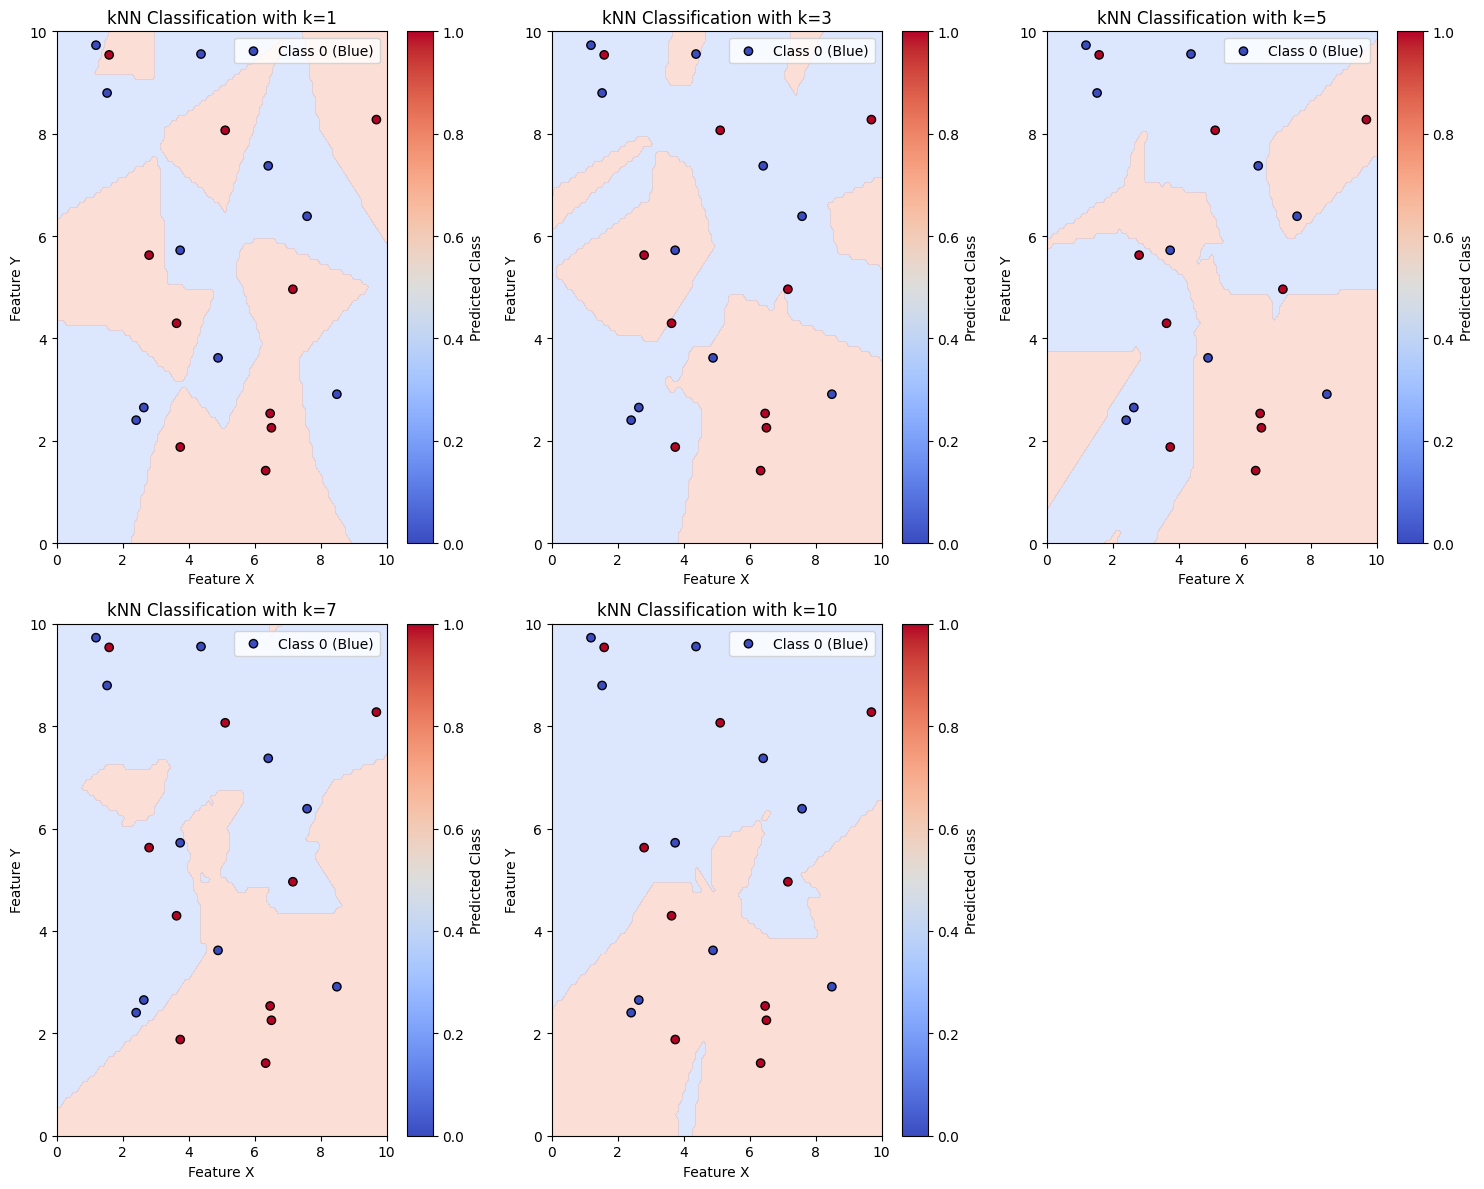

In [31]:
#A5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Generate training data
np.random.seed(42)  # For reproducibility
X_train = np.random.uniform(1, 10, (20, 2))
Y_train = np.array([0]*10 + [1]*10)  # Class 0 and 1

# Define test set data
x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
x_test_flat = x_test.ravel()
y_test_flat = y_test.ravel()
test_points = np.vstack((x_test_flat, y_test_flat)).T

# Values of k to test
k_values = [1, 3, 5, 7, 10]

# Plot for each value of k
plt.figure(figsize=(15, 12))
for i, k in enumerate(k_values, 1):
    # Initialize and train the kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    
    # Predict classes for test set
    y_test_pred = knn_classifier.predict(test_points)
    y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)
    
    # Plot the results
    plt.subplot(2, 3, i)
    plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification with k={k}')
    plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
    plt.colorbar(label='Predicted Class')

plt.tight_layout()
plt.show()


A6. Repeat the exercises A3 to A5 for your project data considering any two features and classes. 


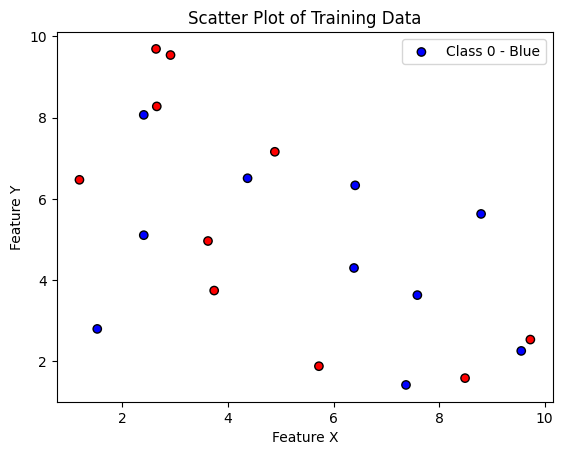

In [33]:
#A6_3
import numpy as np
import matplotlib.pyplot as plt
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Set the random seed for reproducibility
np.random.seed(42)

# Generate 20 data points for X and Y, with values between 1 and 10
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign classes to the data points
# For simplicity, let's assign the first 10 points to class 0 and the last 10 points to class 1
classes = np.array([0]*10 + [1]*10)

# Define colors based on the class
colors = ['blue' if label == 0 else 'red' for label in classes]

# Create a scatter plot
plt.scatter(X, Y, c=colors, edgecolor='k')

# Label the axes
plt.xlabel('Feature X')
plt.ylabel('Feature Y')

# Add a title
plt.title('Scatter Plot of Training Data')

# Add a legend
plt.legend(['Class 0 - Blue', 'Class 1 - Red'])

# Display the plot
plt.show()


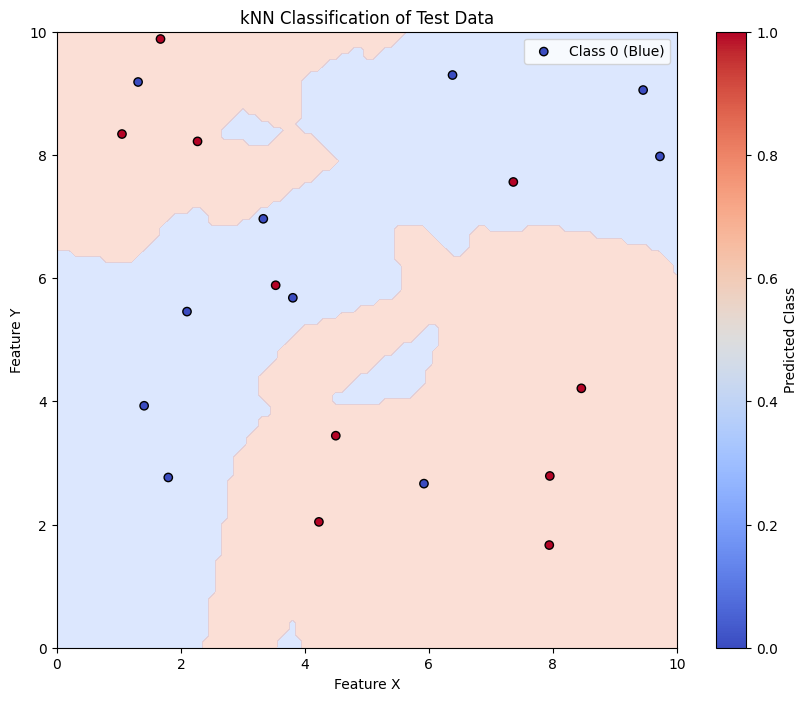

In [34]:
#A6_4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Recreate the training data for the kNN classifier
# Generate 20 training points
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
X_train = np.random.uniform(1, 10, (20, 2))
Y_train = np.array([0]*10 + [1]*10)  # Class 0 and 1

# Define the kNN classifier and train it
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, Y_train)

# Generate test set data
x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
x_test_flat = x_test.ravel()
y_test_flat = y_test.ravel()
test_points = np.vstack((x_test_flat, y_test_flat)).T

# Predict classes for test set
y_test_pred = knn_classifier.predict(test_points)

# Reshape predictions for plotting
y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)

# Plot the test data with color coding based on the predicted class
plt.figure(figsize=(10, 8))
plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
plt.colorbar(label='Predicted Class')
plt.show()


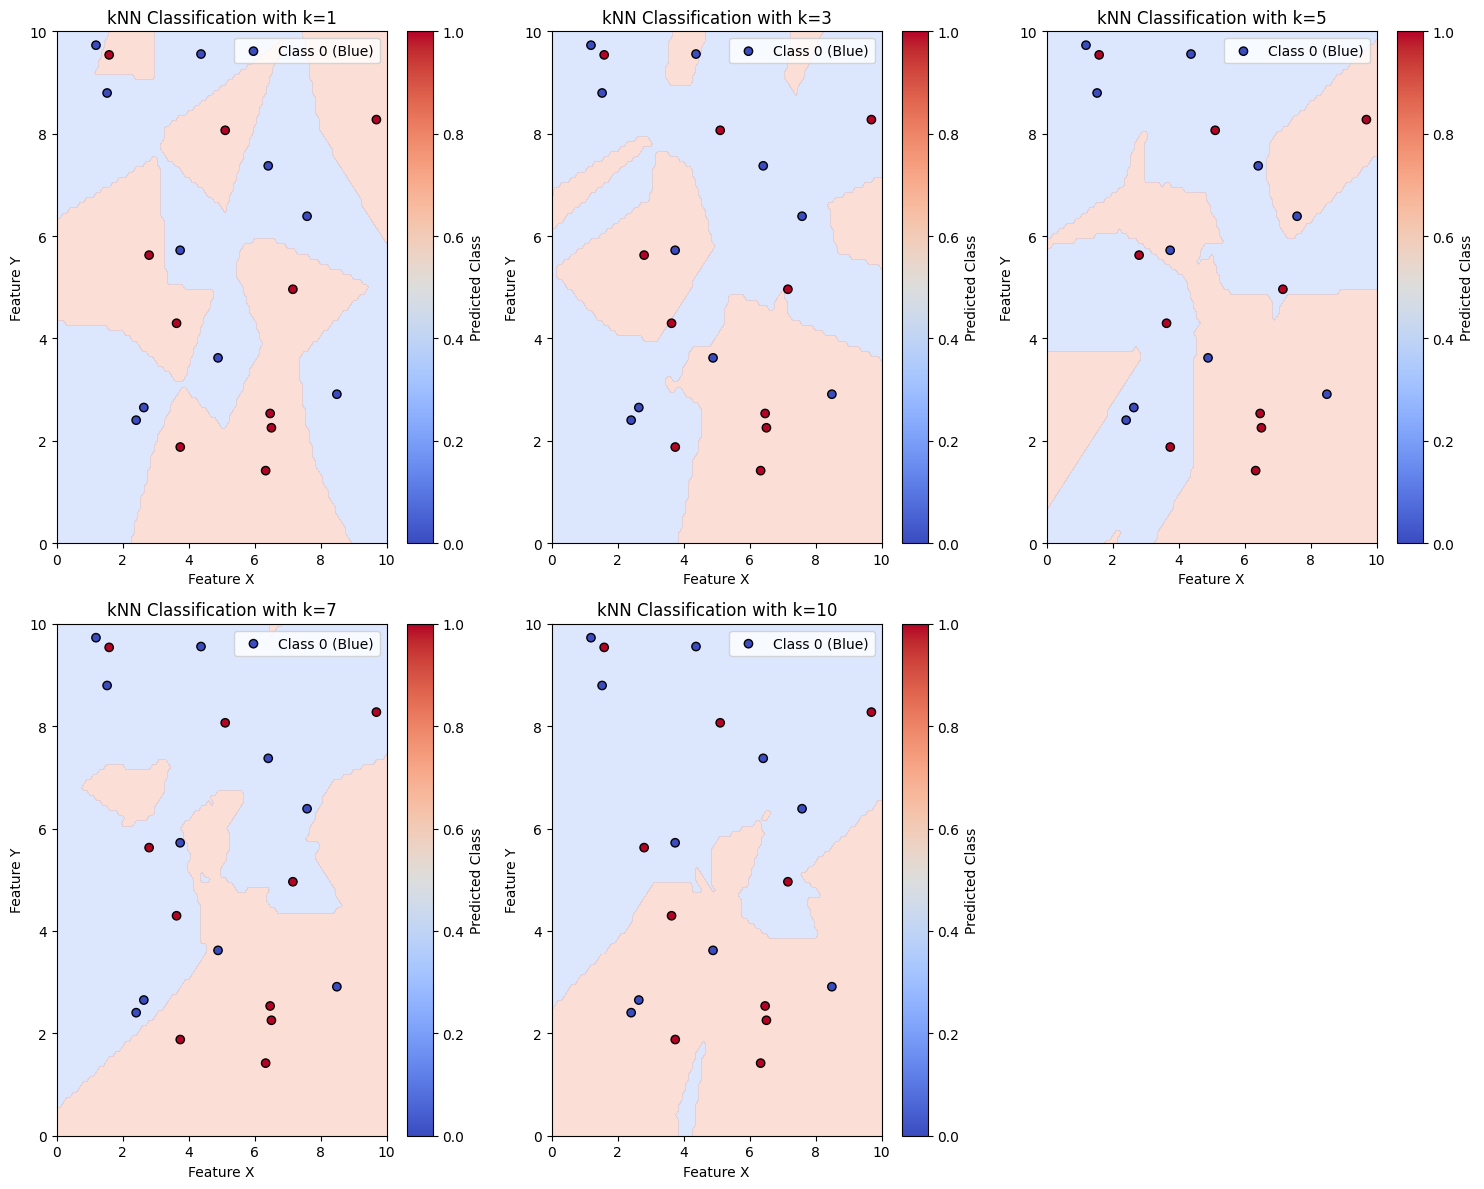

In [35]:
#A6_5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Generate training data
np.random.seed(42)  # For reproducibility
X_train = np.random.uniform(1, 10, (20, 2))
Y_train = np.array([0]*10 + [1]*10)  # Class 0 and 1

# Define test set data
x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
x_test_flat = x_test.ravel()
y_test_flat = y_test.ravel()
test_points = np.vstack((x_test_flat, y_test_flat)).T

# Values of k to test
k_values = [1, 3, 5, 7, 10]

# Plot for each value of k
plt.figure(figsize=(15, 12))
for i, k in enumerate(k_values, 1):
    # Initialize and train the kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    
    # Predict classes for test set
    y_test_pred = knn_classifier.predict(test_points)
    y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)
    
    # Plot the results
    plt.subplot(2, 3, i)
    plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification with k={k}')
    plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
    plt.colorbar(label='Predicted Class')

plt.tight_layout()
plt.show()


A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your 
kNN classifier. This is called hyper-parameter tuning. 

In [37]:
#A7
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path1 = 'training_mathbert.xlsx'
df = pd.read_excel(file_path1)

# Define feature columns and target variable
embedding_columns = df.columns[:-1]  # All columns except the last one
class_labels = df['output']

# Ensure target variable is categorical
if np.issubdtype(df['output'].dtype, np.number):
    df['output'] = pd.cut(df['output'], bins=2, labels=[0, 1])

# Prepare training data
X_train = df[embedding_columns].values
y_train = df['output'].values

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Define the parameter grid for k
param_grid = {
    'n_neighbors': list(range(1, 21))  # Testing k values from 1 to 20
}

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with the kNN classifier and parameter grid
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameter and the best score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k value: {best_k}")
print(f"Best cross-validated accuracy: {best_score:.4f}")

# Predict using the best model
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test)

# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best k value: 5
Best cross-validated accuracy: 0.7741
Test set accuracy: 0.6982


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define the parameter distribution for k
param_dist = {
    'n_neighbors': np.arange(1, 21)  # Randomly sampling k values from 1 to 20
}

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Initialize RandomizedSearchCV with the kNN classifier and parameter distribution
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best parameter and the best score
best_k = random_search.best_params_['n_neighbors']
best_score = random_search.best_score_

print(f"Best k value: {best_k}")
print(f"Best cross-validated accuracy: {best_score:.4f}")

# Predict using the best model
best_knn = random_search.best_estimator_
y_test_pred = best_knn.predict(X_test)

# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best k value: 12
Best cross-validated accuracy: 0.7577
Test set accuracy: 0.7160
